In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
loan_data = pd.read_json('/content/drive/MyDrive/Loan Approval/loan_approval_dataset.json')

In [86]:
loan_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [87]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [88]:
loan_data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# **Missing Values**

In [89]:
#No missing values in dataset
loan_data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# **Unique Values**

In [90]:
for i in loan_data.columns:
  print(f'The unique values of {i} are:\n\n {loan_data[i].value_counts()}\n\n and number of unique values :{loan_data[i].nunique()}\n\n')

The unique values of Id are:

 Id
1         1
167991    1
167993    1
167994    1
167995    1
         ..
84005     1
84006     1
84007     1
84008     1
252000    1
Name: count, Length: 252000, dtype: int64

 and number of unique values :252000


The unique values of Income are:

 Income
7936020    77
9775375    71
1996629    71
9345456    70
1886371    40
           ..
8927336     1
5656901     1
8171741     1
3164826     1
9070230     1
Name: count, Length: 41920, dtype: int64

 and number of unique values :41920


The unique values of Age are:

 Age
27    5197
66    5092
48    4967
33    4921
41    4827
45    4806
54    4785
68    4772
35    4643
50    4624
69    4617
76    4585
55    4563
25    4543
72    4533
79    4505
60    4504
59    4498
53    4490
47    4483
30    4468
78    4455
22    4430
34    4414
57    4394
58    4368
56    4344
24    4326
23    4322
62    4311
31    4257
70    4251
61    4235
40    4233
43    4206
21    4205
49    4203
26    4156
37    4153
71    4150


In [91]:
loan_data= loan_data.drop(['Id'],axis=1)

In [92]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [93]:
numerical_features =loan_data.select_dtypes(include=['int64','float64']).columns
categorical_features =loan_data.select_dtypes(include=['object']).columns

# **Variable Description:**

1) Income: Annual salary

2) Age: Age of the person

3) Experience: Work Experience

4) Married/Single: Married or Single

5) House_Ownership: rented/owned/ norent_noown

6) Car_Ownership: Owns car or not (yes/no)

7) Profession: Type of profession

8) City: City

9)State: State

10) CURRENT_JOB_YRS: How many years the person is working on current job.

11)CURRENT_HOUSE_YRS: How many years the person is living in current house.

12)Risk_Flag: Target Variable, 0-Good customer for loan, 1- Risky customer to give loan



# **Outlier Analysis**

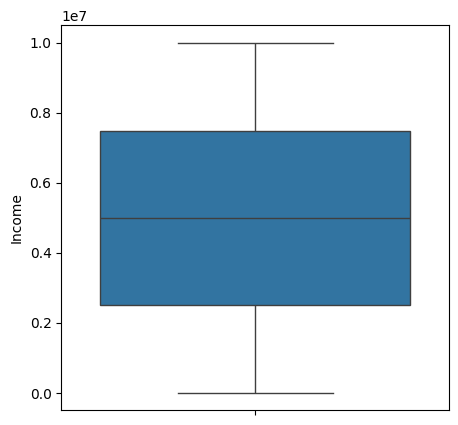

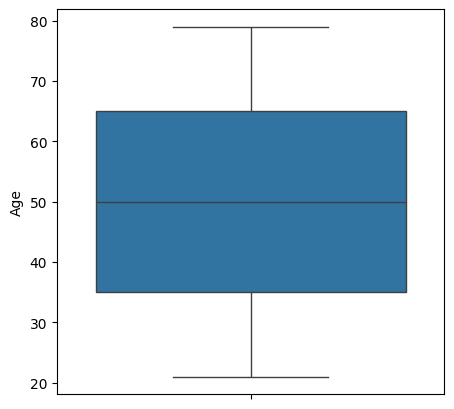

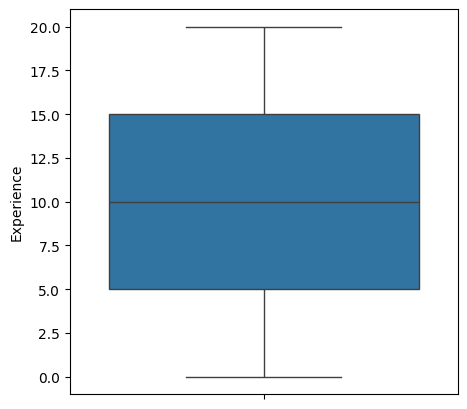

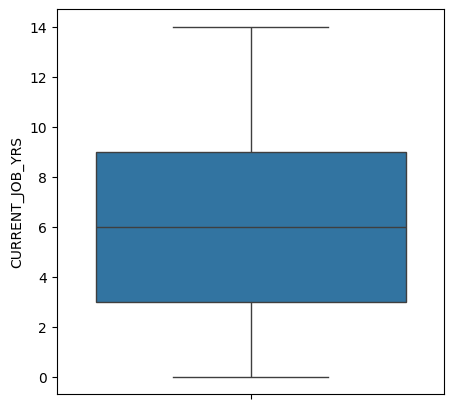

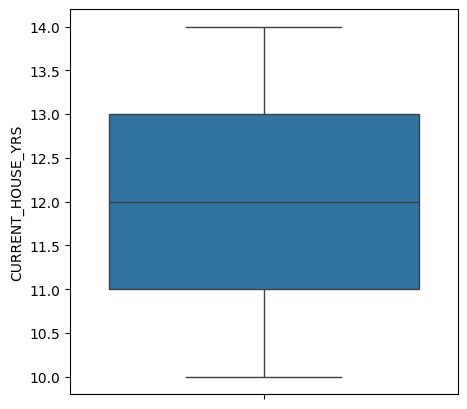

In [94]:
for column in numerical_features.drop('Risk_Flag'):
  plt.figure(figsize=(5,5))
  sns.boxplot(loan_data[column])

In [95]:
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [96]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in numerical_features.drop('Risk_Flag'):
  print(feature,":")
  detect_outliers(loan_data[feature])
  print("\n")

Income :
q1:2503015.0, q2:5000694.5, q3:7477502.0
Lower bound: -4958715.5, Upper bound: 14939232.5, IQR: 4974487.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Age :
q1:35.0, q2:50.0, q3:65.0
Lower bound: -10.0, Upper bound: 110.0, IQR: 30.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Experience :
q1:5.0, q2:10.0, q3:15.0
Lower bound: -10.0, Upper bound: 30.0, IQR: 10.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CURRENT_JOB_YRS :
q1:3.0, q2:6.0, q3:9.0
Lower bound: -6.0, Upper bound: 18.0, IQR: 6.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CURRENT_HOUSE_YRS :
q1:11.0, q2:12.0, q3:13.0
Lower bound: 8.0, Upper bound: 16.0, IQR: 2.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %




In [97]:
#No outliers present on continuous numerical columns

# **Univariate Analysis**

Risk_Flag

In [98]:
loan_data['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [99]:
#Dealing with Unbalanced data
print(f'Percentage of good customers: {loan_data["Risk_Flag"].value_counts()[0]*100/len(loan_data)}')
print(f'Percentage of risky customers: {loan_data["Risk_Flag"].value_counts()[1]*100/len(loan_data)}')

Percentage of good customers: 87.7
Percentage of risky customers: 12.3


<Axes: xlabel='Risk_Flag'>

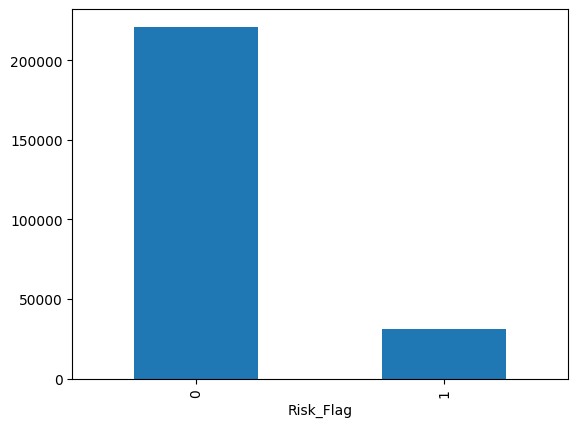

In [100]:
loan_data['Risk_Flag'].value_counts().plot(kind='bar')

CURRENT_HOUSE_YRS

In [101]:
loan_data['CURRENT_HOUSE_YRS'].value_counts()

CURRENT_HOUSE_YRS
11    51873
12    51791
13    50659
14    49003
10    48674
Name: count, dtype: int64

<Axes: xlabel='CURRENT_HOUSE_YRS'>

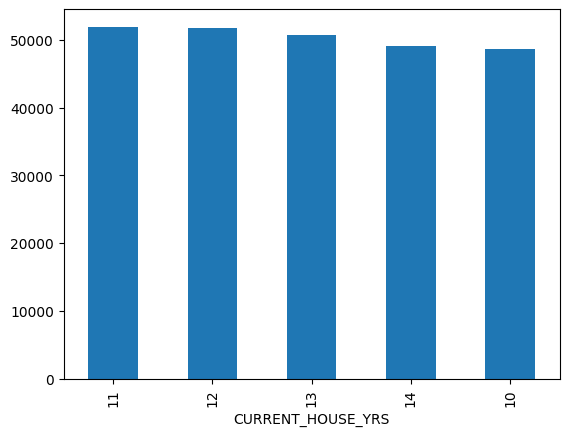

In [102]:
loan_data['CURRENT_HOUSE_YRS'].value_counts().plot(kind='bar')

In [103]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [104]:
mod= ols('Risk_Flag ~ CURRENT_HOUSE_YRS', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                         sum_sq        df         F    PR(>F)
CURRENT_HOUSE_YRS      0.520348       1.0  4.823851  0.028069
Residual           27182.971652  251998.0       NaN       NaN


<Axes: xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

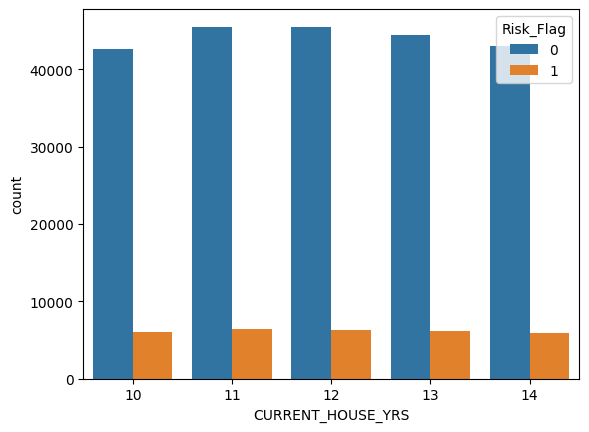

In [105]:
sns.countplot(x='CURRENT_HOUSE_YRS', hue='Risk_Flag', data=loan_data)

CURRENT_JOB_YRS

In [106]:
loan_data['CURRENT_JOB_YRS'].value_counts()

CURRENT_JOB_YRS
3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: count, dtype: int64

<Axes: xlabel='CURRENT_JOB_YRS'>

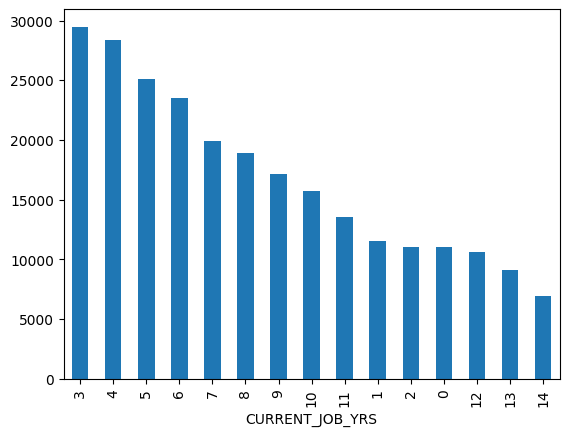

In [107]:
loan_data['CURRENT_JOB_YRS'].value_counts().plot(kind='bar')

In [108]:
mod= ols('Risk_Flag ~ CURRENT_JOB_YRS', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                      sum_sq        df          F        PR(>F)
CURRENT_JOB_YRS      7.80213       1.0  72.348526  1.813221e-17
Residual         27175.68987  251998.0        NaN           NaN


<Axes: xlabel='CURRENT_JOB_YRS', ylabel='count'>

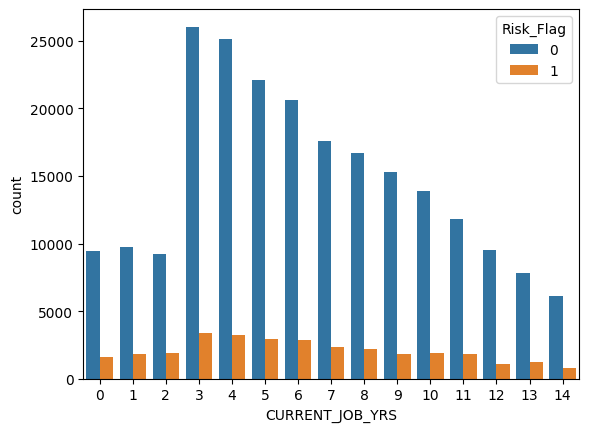

In [109]:
sns.countplot(x='CURRENT_JOB_YRS', hue='Risk_Flag', data=loan_data)

STATE

In [110]:
loan_data['STATE'].value_counts()

STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64

<Axes: xlabel='STATE'>

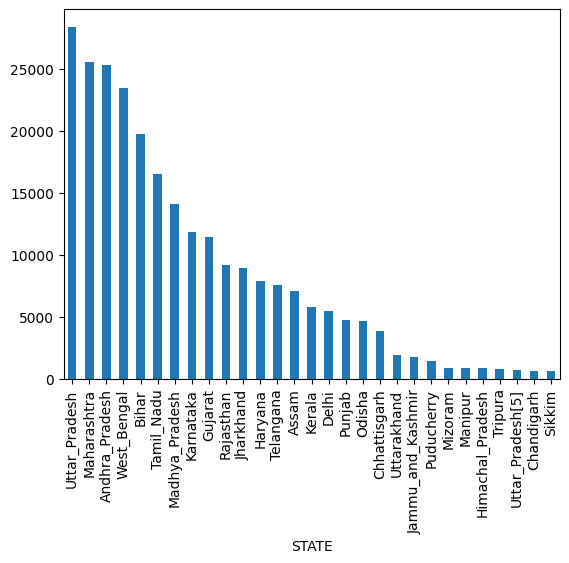

In [111]:
loan_data['STATE'].value_counts().plot(kind='bar')

In [112]:
mod= ols('Risk_Flag ~ STATE', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)


                sum_sq        df          F         PR(>F)
STATE        79.112246      28.0  26.266171  1.224781e-136
Residual  27104.379754  251971.0        NaN            NaN


<Axes: xlabel='STATE', ylabel='count'>

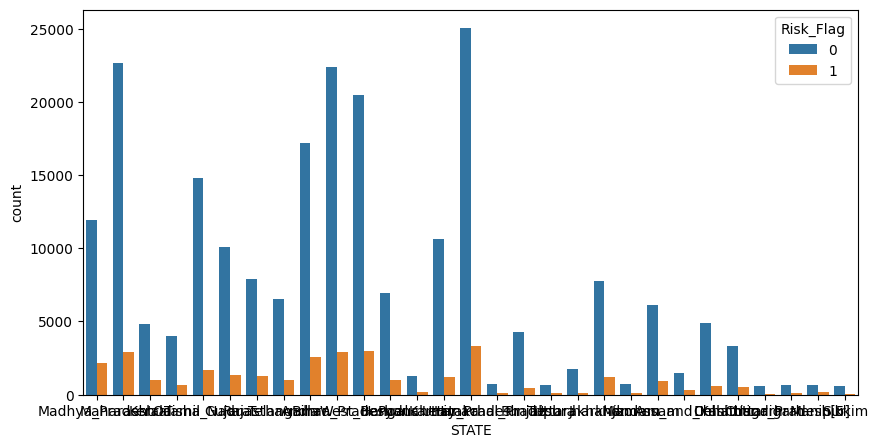

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x='STATE', hue='Risk_Flag', data=loan_data)

CITY

In [114]:
loan_data['CITY'].value_counts()

CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64

In [115]:
mod= ols('Risk_Flag ~ CITY', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                sum_sq        df          F  PR(>F)
CITY        563.422454     316.0  16.857446     0.0
Residual  26620.069546  251683.0        NaN     NaN


Profession

In [116]:
loan_data['Profession'].value_counts()

Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

<Axes: xlabel='Profession'>

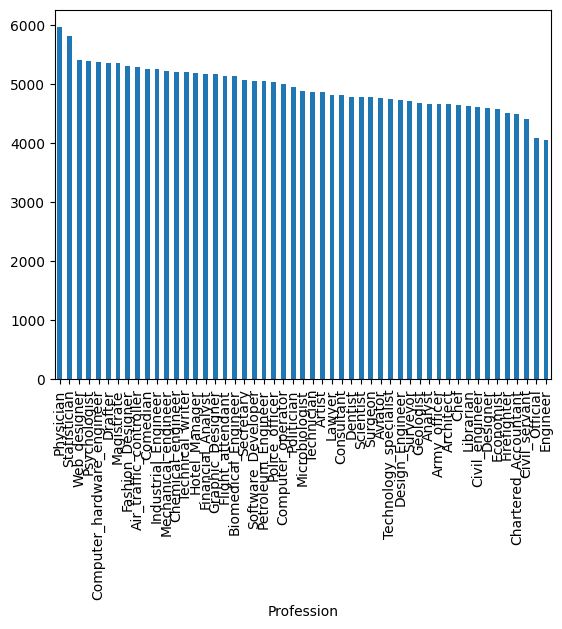

In [117]:
loan_data['Profession'].value_counts().plot(kind='bar')

In [118]:
mod= ols('Risk_Flag ~ Profession', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                  sum_sq        df          F        PR(>F)
Profession     66.177371      50.0  12.297178  3.730110e-98
Residual    27117.314629  251949.0        NaN           NaN


Car_Ownership

In [119]:
loan_data['Car_Ownership'].value_counts()

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64

<Axes: xlabel='Car_Ownership'>

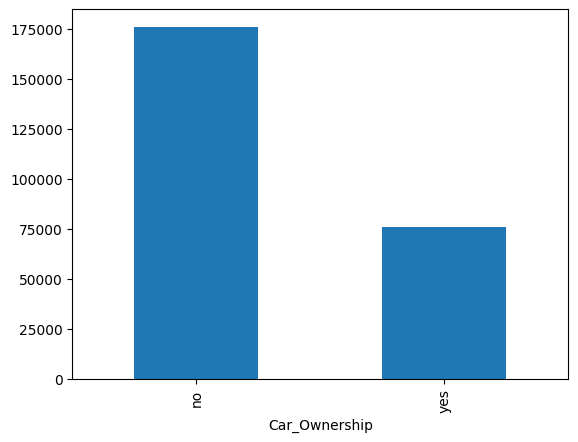

In [120]:
loan_data['Car_Ownership'].value_counts().plot(kind='bar')

In [121]:
mod= ols('Risk_Flag ~ Car_Ownership', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                     sum_sq        df           F        PR(>F)
Car_Ownership     15.704201       1.0  145.666154  1.568877e-33
Residual       27167.787799  251998.0         NaN           NaN


<Axes: xlabel='Car_Ownership', ylabel='count'>

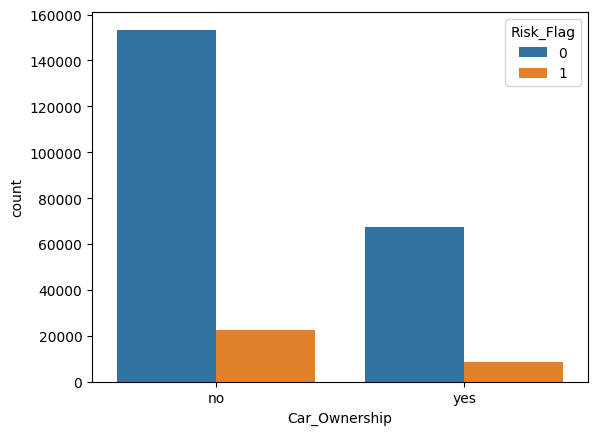

In [122]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=loan_data)

House_Ownership

In [123]:
loan_data['House_Ownership'].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

<Axes: xlabel='House_Ownership'>

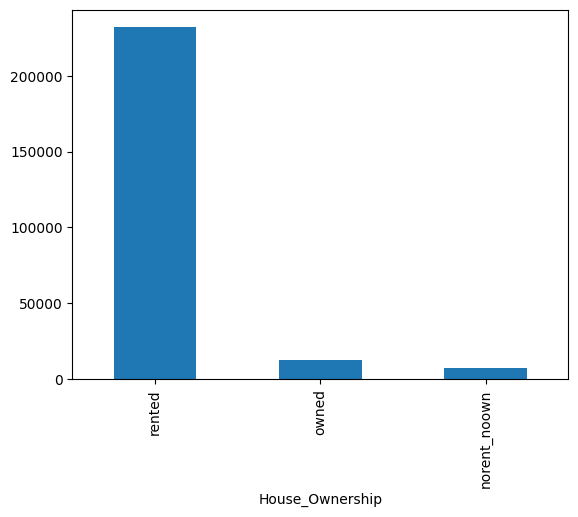

In [124]:
loan_data['House_Ownership'].value_counts().plot(kind='bar')

In [125]:
mod= ols('Risk_Flag ~ House_Ownership', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                       sum_sq        df          F        PR(>F)
House_Ownership     19.739232       2.0  91.560018  1.780043e-40
Residual         27163.752768  251997.0        NaN           NaN


<Axes: xlabel='House_Ownership', ylabel='count'>

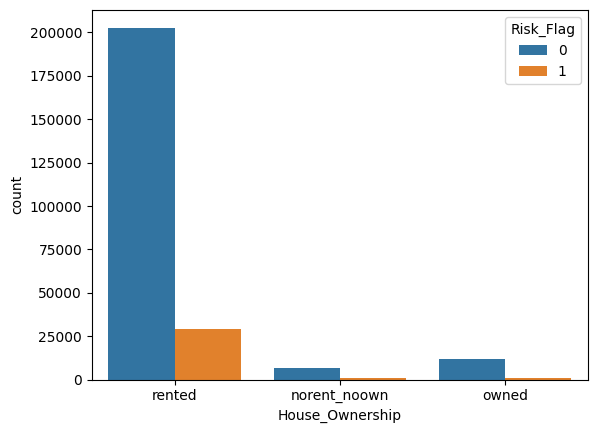

In [126]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=loan_data)

Married/Single

In [127]:
loan_data['Married/Single'].value_counts()

Married/Single
single     226272
married     25728
Name: count, dtype: int64

<Axes: xlabel='Married/Single'>

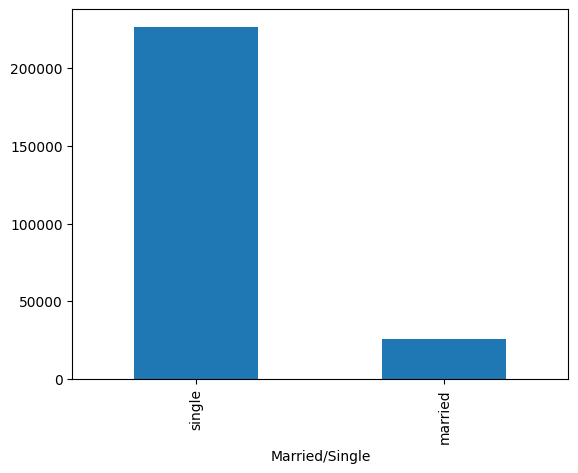

In [128]:
loan_data['Married/Single'].value_counts().plot(kind='bar')

<Axes: xlabel='Married/Single', ylabel='count'>

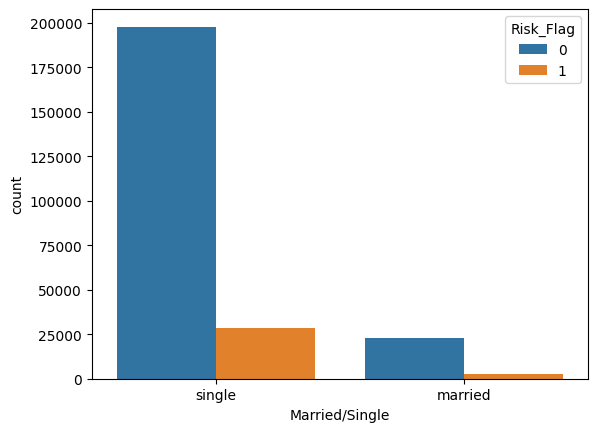

In [129]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=loan_data)

Experience

In [130]:
loan_data['Experience'].value_counts()

Experience
6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: count, dtype: int64

<Axes: xlabel='Experience'>

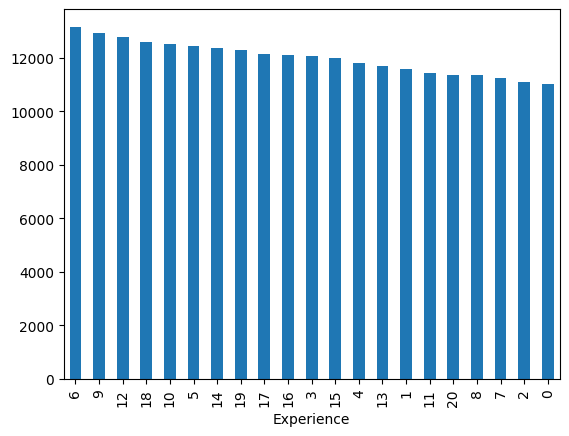

In [131]:
loan_data['Experience'].value_counts().plot(kind='bar')

In [132]:
mod= ols('Risk_Flag ~ Experience', data= loan_data).fit()
anova_table= sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                  sum_sq        df           F        PR(>F)
Experience     32.397579       1.0  300.692307  2.547563e-67
Residual    27151.094421  251998.0         NaN           NaN


<Axes: xlabel='Experience', ylabel='count'>

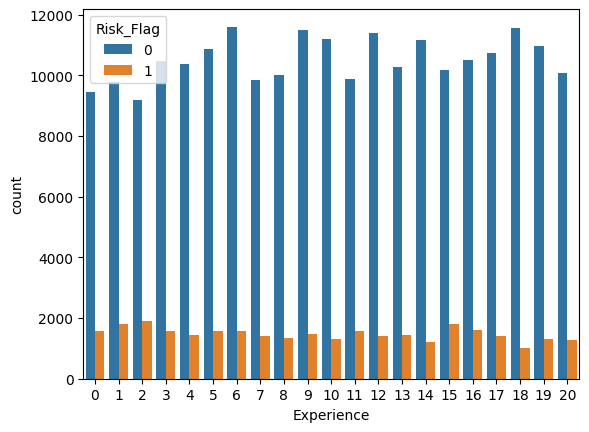

In [133]:
sns.countplot(x='Experience', hue='Risk_Flag', data=loan_data)

Age

<Axes: xlabel='Age', ylabel='Density'>

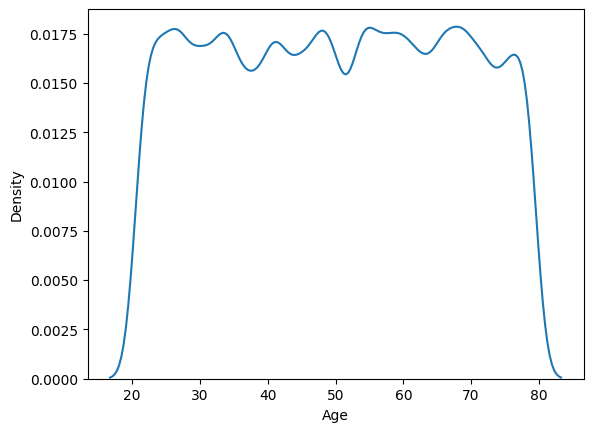

In [134]:
sns.kdeplot(loan_data['Age'])

Income

<Axes: xlabel='Income', ylabel='Density'>

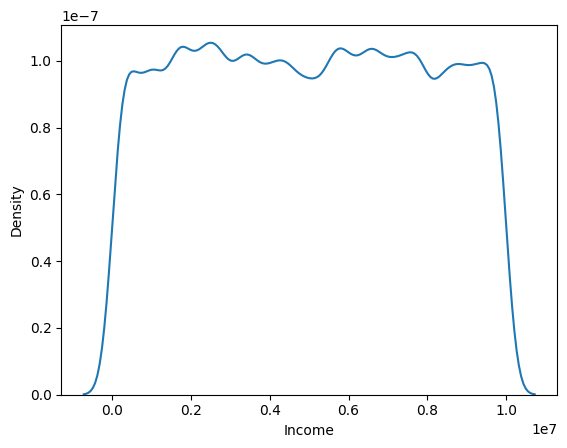

In [135]:
sns.kdeplot(loan_data['Income'])

1) Rented customers have more risky customers than any other category.

2) Single customer have more risky customers than any other category.

# **Encoding of categorical variables**

In [136]:
df= loan_data.copy()

In [137]:
df= pd.get_dummies(df, drop_first=True, dtype=int)

In [138]:
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,3,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# **Scaling data**

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler= StandardScaler()
target= df['Risk_Flag']
independent= df.drop('Risk_Flag', axis=1)
df.drop('Risk_Flag', axis=1, inplace= True)
scaled_df= scaler.fit_transform(independent)
scaled_df= pd.DataFrame(scaled_df, columns= df.columns)

In [141]:
from sklearn.model_selection import train_test_split
x=scaled_df

y=target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100, stratify=y)

# **Model-1 :Logistic Regression**

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [143]:
clf= LogisticRegression(class_weight='balanced')
model1 =clf.fit(x_train,y_train)

In [144]:
train_predict= model1.predict(x_train)

In [145]:
test_predict= model1.predict(x_test)

In [146]:
print(f'TRAINING DATA')
print(metrics.classification_report(y_train,train_predict))
roc= round(roc_auc_score(y_train,train_predict),2)
print(f'ROC-AUC Score:{roc}')

TRAINING DATA
              precision    recall  f1-score   support

           0       0.91      0.57      0.70    154703
           1       0.17      0.62      0.27     21697

    accuracy                           0.58    176400
   macro avg       0.54      0.60      0.48    176400
weighted avg       0.82      0.58      0.65    176400

ROC-AUC Score:0.6


In [147]:
print(f'TEST DATA')
print(metrics.classification_report(y_test,test_predict))
roc= round(roc_auc_score(y_test,test_predict),2)
print(f'ROC-AUC Score:{roc}')

TEST DATA
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     66301
           1       0.17      0.60      0.26      9299

    accuracy                           0.58     75600
   macro avg       0.54      0.59      0.48     75600
weighted avg       0.82      0.58      0.65     75600

ROC-AUC Score:0.59


# **Model-2 : Random Forest Classifier**

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf= RandomForestClassifier(max_depth=50,random_state=100,class_weight='balanced_subsample',n_jobs=-1)
model2= rf.fit(x_train,y_train)
train_predict= model2.predict(x_train)
test_predict= model2.predict(x_test)

In [150]:
print(f'TRAINING DATA')
print(metrics.classification_report(y_train,train_predict))
roc= round(roc_auc_score(y_train,train_predict),2)
print(f'ROC-AUC Score:{roc}')

TRAINING DATA
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    154703
           1       0.61      0.95      0.74     21697

    accuracy                           0.92    176400
   macro avg       0.80      0.93      0.85    176400
weighted avg       0.95      0.92      0.93    176400

ROC-AUC Score:0.93


In [151]:
print(f'TEST DATA')
print(metrics.classification_report(y_test,test_predict))
roc= round(roc_auc_score(y_test,test_predict),2)
print(f'ROC-AUC Score:{roc}')

TEST DATA
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66301
           1       0.56      0.77      0.65      9299

    accuracy                           0.90     75600
   macro avg       0.76      0.84      0.79     75600
weighted avg       0.92      0.90      0.90     75600

ROC-AUC Score:0.84


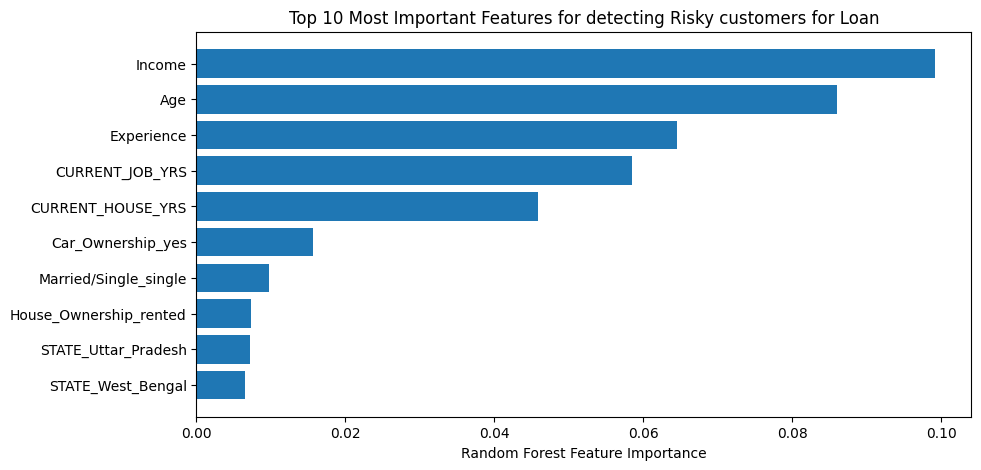

In [152]:
#Feature Importance
feature_importance= model2.feature_importances_
top_10_feat_idx= np.argsort(feature_importance)[-10:]
top_10_features = scaled_df.columns[top_10_feat_idx]
top_10_importances= feature_importance[top_10_feat_idx]

sorted_idx = np.argsort(top_10_importances)
top_10_features = top_10_features[sorted_idx]
top_10_importances = top_10_importances[sorted_idx]

plt.figure(figsize=(10,5))
plt.barh(top_10_features, top_10_importances)
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 10 Most Important Features for detecting Risky customers for Loan")
plt.show()

# **Model-3 Random forest with SMOTE**

In [153]:
pip install imbalanced-learn

In [154]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [155]:
smote= SMOTE(sampling_strategy="auto",random_state=100)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [156]:
y_resampled.value_counts()


Risk_Flag
0    221004
1    221004
Name: count, dtype: int64

In [157]:
#Final ML model
x_train, x_test, y_train, y_test = train_test_split(x_resampled ,y_resampled, test_size=0.30, random_state=100)

model3= rf.fit(x_train,y_train)
train_predict= model3.predict(x_train)
test_predict= model3.predict(x_test)
print(f"For Training data:")
print(metrics.classification_report(y_train,train_predict))
roc= round(roc_auc_score(y_train,train_predict),2)
print(f'ROC-AUC Score:{roc}')

print(f"For Testing  data:")
print(metrics.classification_report(y_test,test_predict))
roc= round(roc_auc_score(y_test,test_predict),2)
print(f'ROC-AUC Score:{roc}')

For Training data:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    154858
           1       0.92      0.99      0.96    154547

    accuracy                           0.95    309405
   macro avg       0.96      0.95      0.95    309405
weighted avg       0.96      0.95      0.95    309405

ROC-AUC Score:0.95
For Testing  data:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66146
           1       0.91      0.97      0.94     66457

    accuracy                           0.94    132603
   macro avg       0.94      0.94      0.94    132603
weighted avg       0.94      0.94      0.94    132603

ROC-AUC Score:0.94


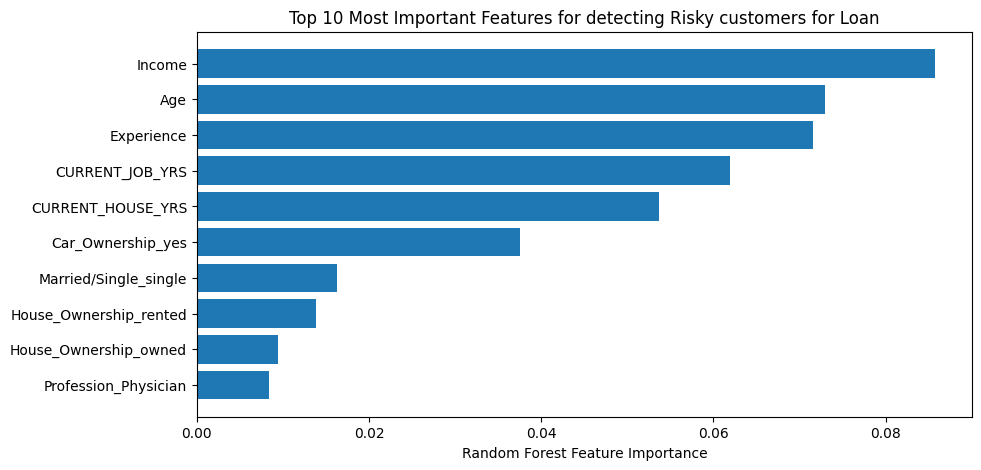

In [158]:
#Feature Importance
feature_importance= model3.feature_importances_
top_10_feat_idx= np.argsort(feature_importance)[-10:]
top_10_features = scaled_df.columns[top_10_feat_idx]
top_10_importances= feature_importance[top_10_feat_idx]

sorted_idx = np.argsort(top_10_importances)
top_10_features = top_10_features[sorted_idx]
top_10_importances = top_10_importances[sorted_idx]

plt.figure(figsize=(10,5))
plt.barh(top_10_features, top_10_importances)
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 10 Most Important Features for detecting Risky customers for Loan")
plt.show()